# Notebook ICD - 4

## Dataset: Iris Species

Install libraries via terminal

In [7]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn

Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset in a dataframe

In [9]:
df = pd.read_csv(r'iris.csv')

Print dataset

In [10]:
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


array([[<Axes: title={'center': 'sepal.length'}>,
        <Axes: title={'center': 'sepal.width'}>],
       [<Axes: title={'center': 'petal.length'}>,
        <Axes: title={'center': 'petal.width'}>]], dtype=object)

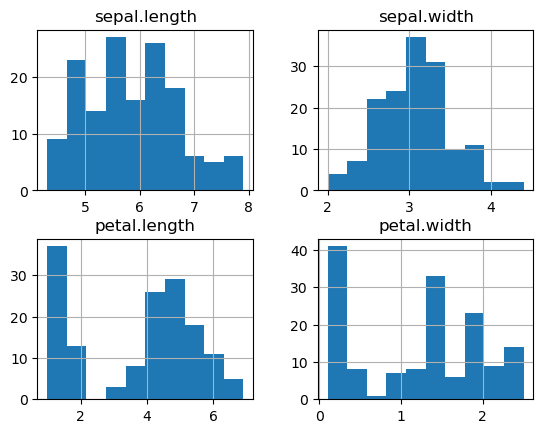

In [11]:
df.hist()

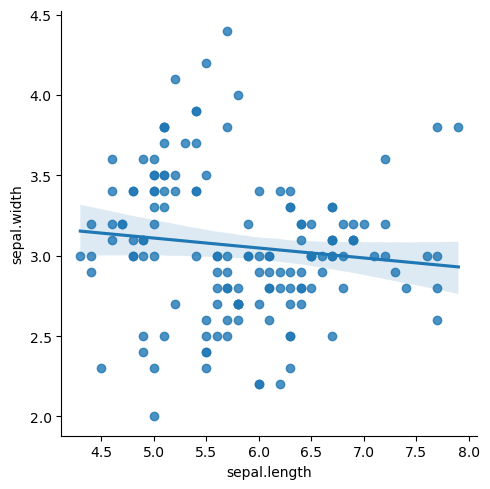

In [12]:
sns.lmplot(x='sepal.length', y='sepal.width', data=df)

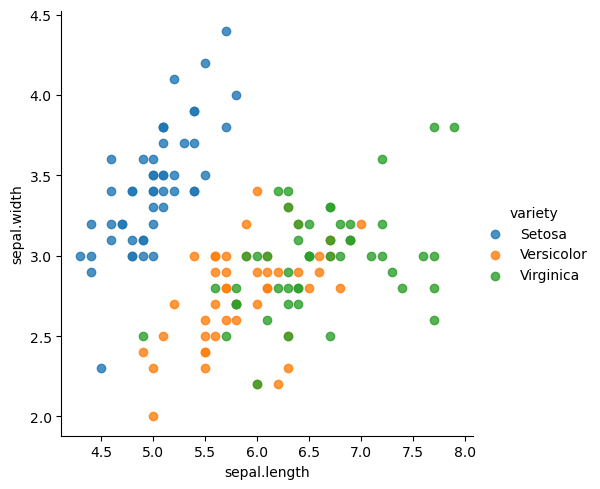

In [13]:
sns.lmplot(x='sepal.length', y='sepal.width', data=df,
           fit_reg=False, # No regression line
           hue='variety')   # Color by species

<Axes: >

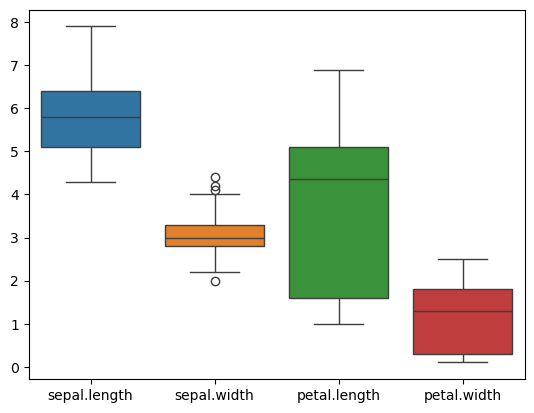

In [14]:
sns.boxplot(data=df)

<Axes: >

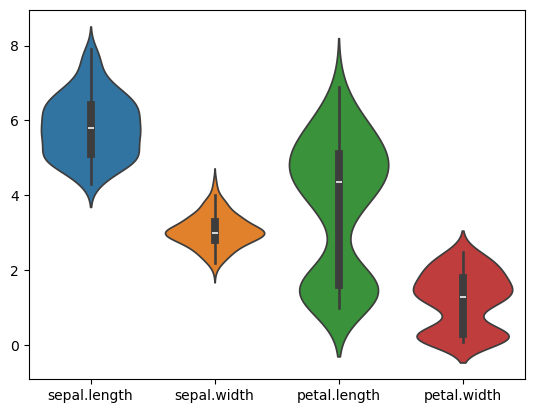

In [15]:
sns.violinplot(data=df)

<Axes: xlabel='variety', ylabel='petal.length'>

/Users/vcx/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


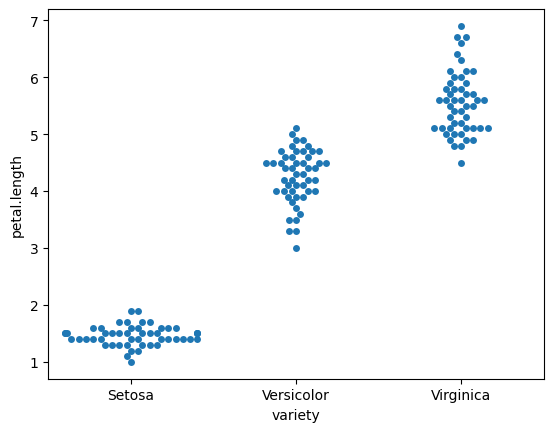

In [16]:
sns.swarmplot(y='petal.length', x='variety', data=df)

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

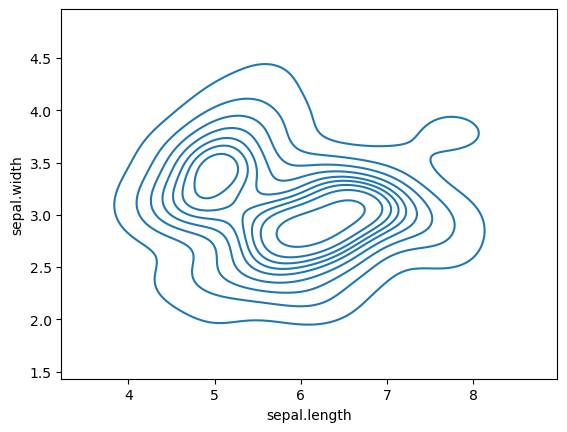

In [17]:
sns.kdeplot(x='sepal.length', y='sepal.width', data=df)

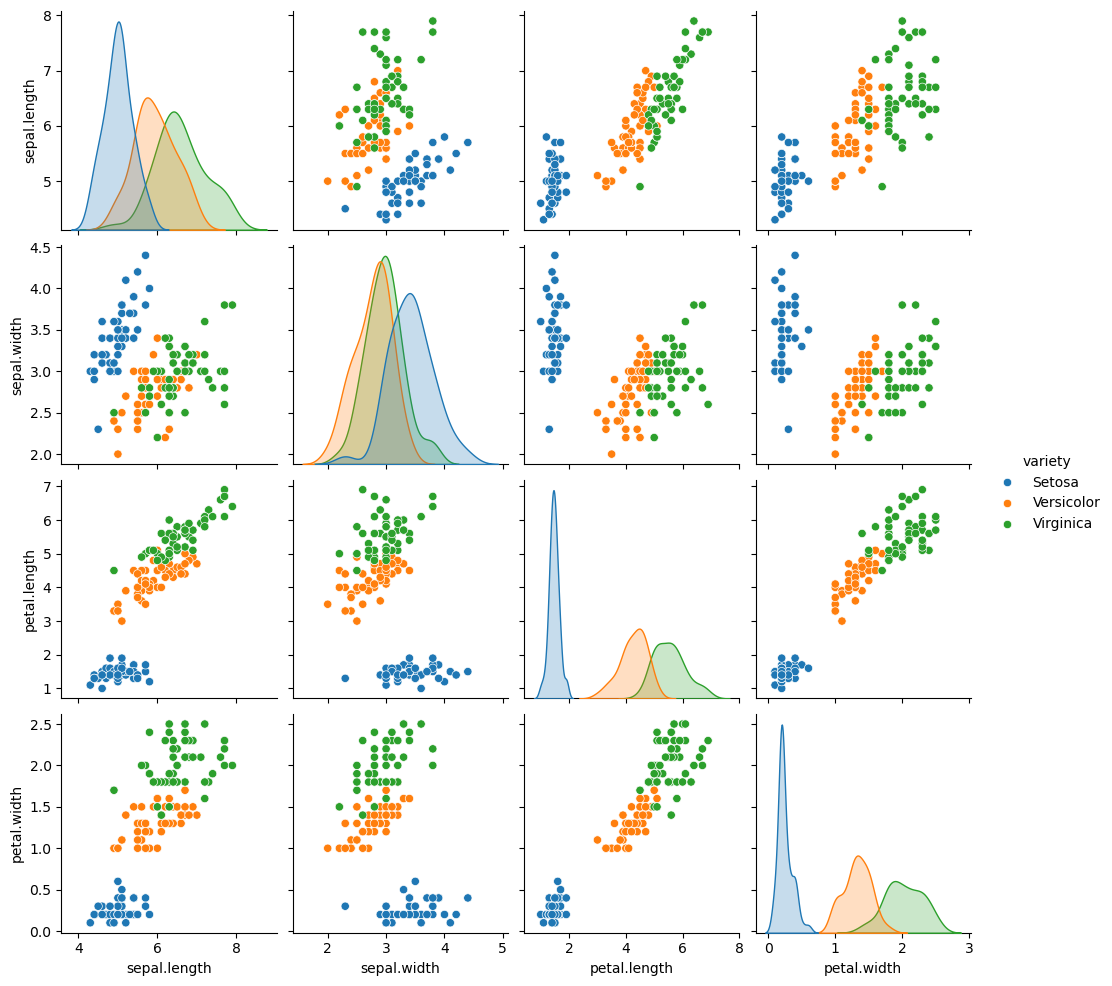

In [18]:
sns.pairplot(df, hue='variety')
plt.show()

## Matplotlib library

### 1D - Bar chart (x, height)

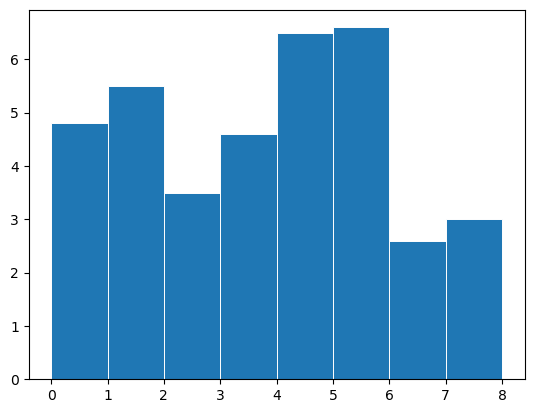

In [19]:
# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.show()

### 1D - pie(x)

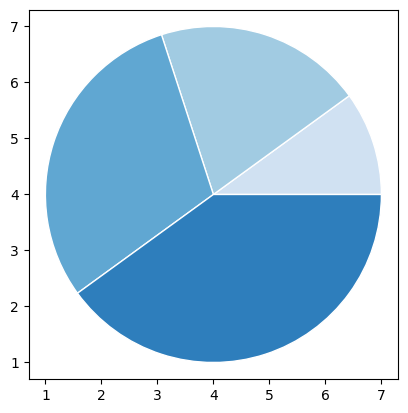

In [20]:
# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

plt.show()

### 2D - plot(x, y)

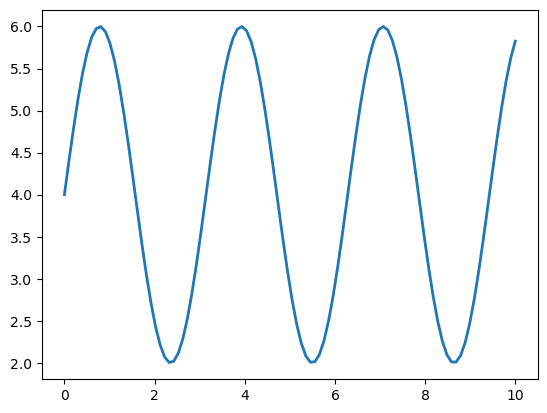

In [21]:
# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
plt.show()

### 3D - Scatter plot

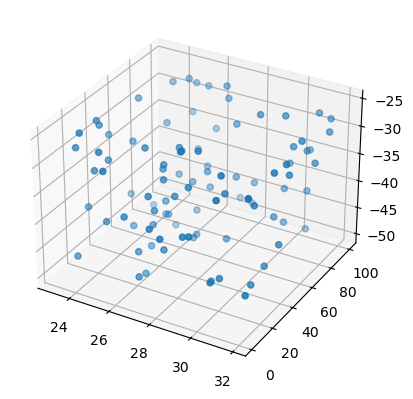

In [22]:
# Make data
np.random.seed(19680801)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(23, 32, n)
ys = rng.uniform(0, 100, n)
zs = rng.uniform(-50, -25, n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs)
plt.show()

## Seaborn library

### 1D - Line plot

<Axes: >

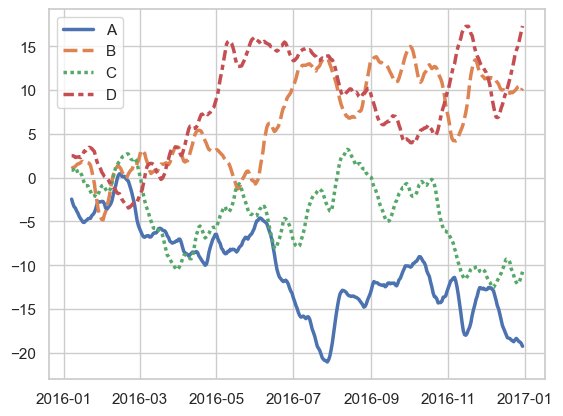

In [23]:
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, linewidth=2.5)

### 2D - Violin plot

/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_841/1409606945.py:22: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)


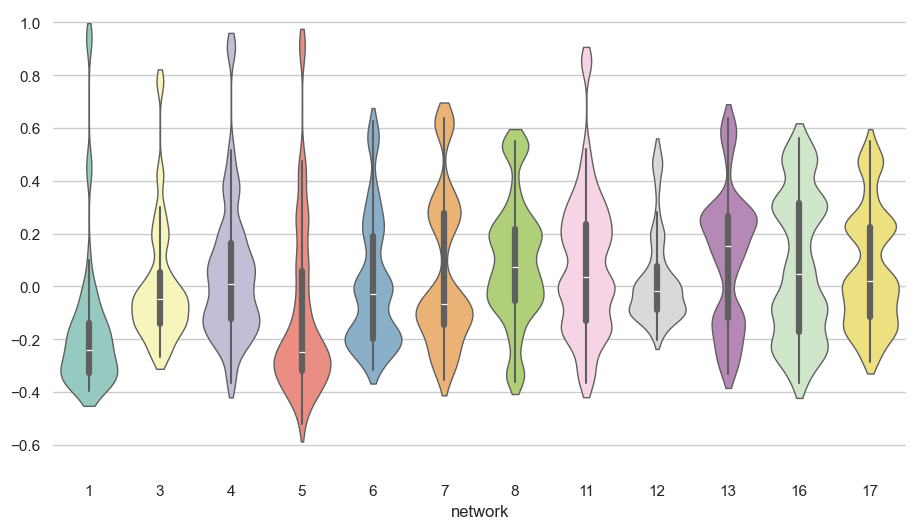

In [24]:
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

### 2D - Grouped boxplots

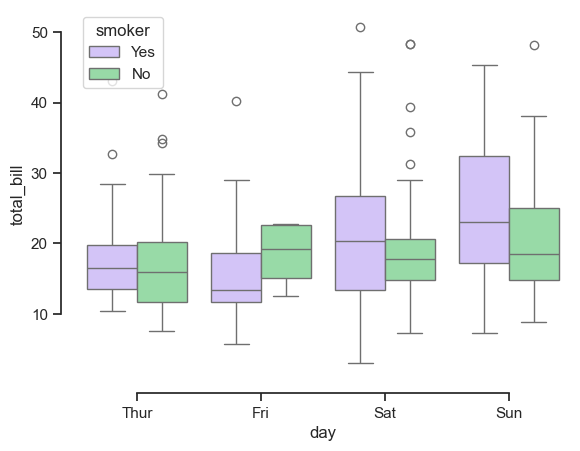

In [25]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

### Multiple Linear Regression

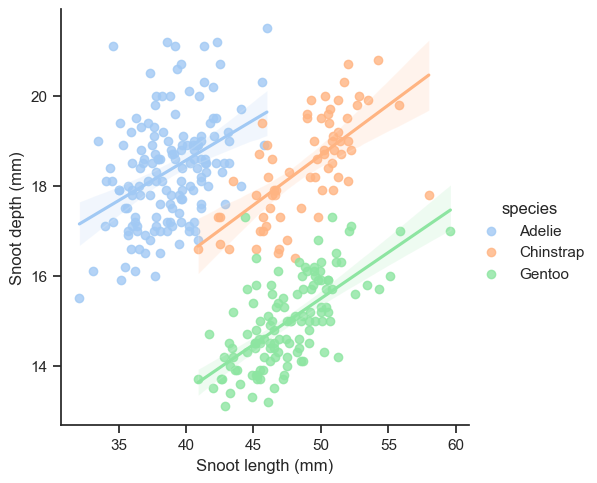

In [26]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [27]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     